# Introduction

In this notebook one will use the MovieLens dataset to

In [1]:
#the dataset can be downloaded here https://files.grouplens.org/datasets/movielens/ml-latest.zip
import pandas as pd

movies = pd.read_csv('ml-latest-small/movies.csv')
movies = movies.set_index('movieId')
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [2]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
total_ratings = ratings['movieId'].value_counts()
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# First recommendation (Baseline)

Considering the movie scores, the most popular movie AKA most rated, to be the one that will be recommended. So, based on that empiric reason one will sort the movie dataset, based on the scores and consider the highest score to be the most probable recommendation.

In [3]:
movies['total_ratings'] = total_ratings
movies.head()

,title,genres,total_ratings
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [4]:
movies.sort_values('total_ratings', ascending=False).head()

,title,genres,total_ratings
movieId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0


Those will be the most recommended movies based on a heuristic and not on data science. Now one will use the average rating scores of the movies as another heuristic to recommend movies.

In [5]:
average_rating_score = ratings.groupby('movieId').mean()['rating']
movies['average_rating_score'] = average_rating_score
movies.head(10)

heuristic1 = movies.copy()

<Axes: xlabel='total_ratings', ylabel='average_rating_score'>

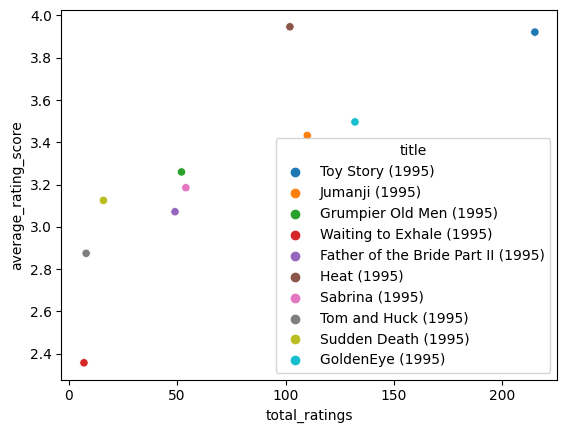

In [6]:
import seaborn as sns

sns.scatterplot(data=heuristic1, hue=heuristic1['title'].head(10), y=heuristic1['average_rating_score'].head(10), x=movies['total_ratings'].head(10))

It seems that some movies have high ratings but not the highest average rating scores. So the heuristic is not correct, although have some good accuracy.

One is considering that the movie's popularity is defined by the average rating score and the total ratings. However, what will happen if one considers only the average rating scores?

<Axes: xlabel='total_ratings', ylabel='average_rating_score'>

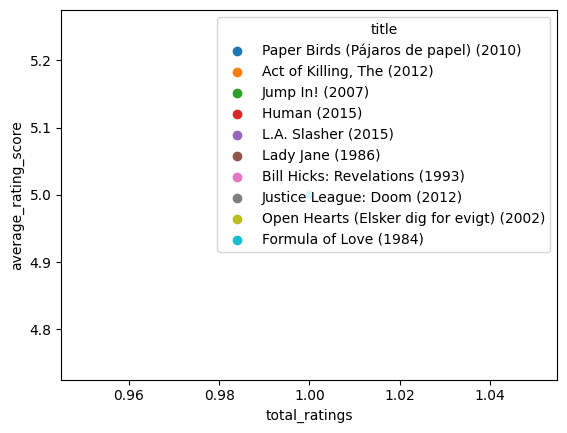

In [7]:
heuristic2 = heuristic1.sort_values('average_rating_score', ascending=False).head(10)
sns.scatterplot(data=heuristic2, hue=heuristic2['title'], y=heuristic2['average_rating_score'], x=heuristic2['total_ratings'])

Now the plot doesn't even is informative, but based on the legends one can see that it is not a good heuristic, since the highest average rated scores are based on less than 3 ratings. 

Let's consider that this heuristic needs to have at least 10 ratings.

<Axes: >

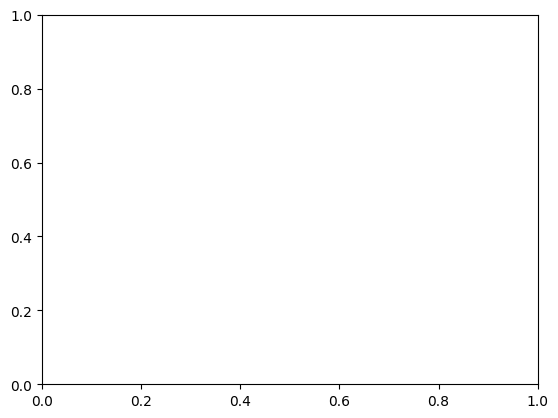

In [8]:
heuristic3 = heuristic2.query('total_ratings >= 10').sort_values('average_rating_score', ascending=False).head(10)
sns.scatterplot(data=heuristic3, hue=heuristic3['title'], y=heuristic3['average_rating_score'], x=heuristic3['total_ratings'])

Now the visualization got better, but now even getting higher rated movies, one got specific low-rated movies with high scores. Maybe with a qeury with >=50 ratings will return a  better visualization.

<Axes: >

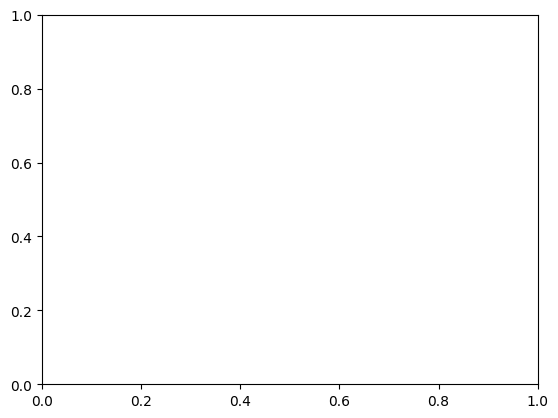

In [9]:
heuristic4 = heuristic3.query('total_ratings >= 50').sort_values('average_rating_score', ascending=False).head(10)
sns.scatterplot(data=heuristic3, hue=heuristic4['title'], y=heuristic4['average_rating_score'], x=heuristic4['total_ratings'])

Nope, nothing changed and data was removed. Using a heuristic will result in a biased result even if the appearance of those results is logically right. Now one will refine the way recommendation is made.

## Heuristic recommendation based on someone and genres

Considering that one watched x,y and the z movies, what will be recommended?


In [10]:
someone_watched_list= [2571, 1011, 356, 296, 44, 48, 1,]
movies.loc[someone_watched_list]

,title,genres,total_ratings,average_rating_score
movieId,,,,
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
1011,Herbie Rides Again (1974),Children|Comedy|Fantasy|Romance,8.0,2.937500
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
44,Mortal Kombat (1995),Action|Adventure|Fantasy,46.0,2.543478
48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance,68.0,3.147059
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930


Now one will recommend movies considering the genres Action|Sci-Fi|Thriller, since it is the first movie in the list.

<Axes: xlabel='total_ratings', ylabel='average_rating_score'>

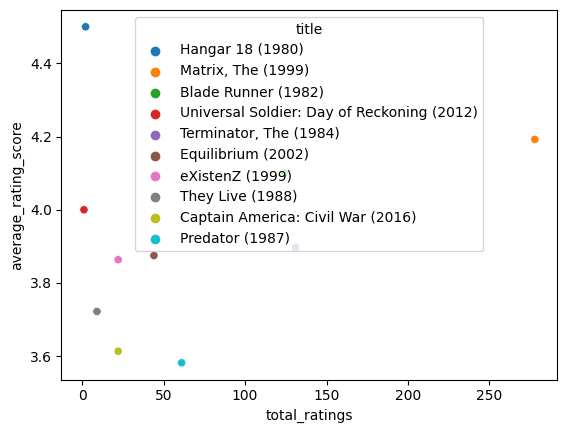

In [11]:
heuristic5 = movies.query('genres =="Action|Sci-Fi|Thriller"').sort_values('average_rating_score', ascending=False).head(10)
sns.scatterplot(data=heuristic5, hue=heuristic5['title'], y=heuristic5['average_rating_score'], x=heuristic5['total_ratings'])

This way one got recommended The Matrix again and also some other movies with low ratings but high scores.

# Collaborative filtering x Content based filtering

A good recommendation system should possess several key traits to be effective and provide value to its users. Here are some of the best traits a recommendation system should have:

Accuracy: The recommendations provided should be accurate and relevant to the user's preferences. High accuracy ensures that the system understands the user's interests and delivers personalized recommendations.

Personalization: Each user is unique, and a good recommendation system should be able to personalize recommendations based on individual preferences, behavior, and history. Personalized recommendations increase user satisfaction and engagement.

Scalability: The system should be able to handle a large number of users, items, and interactions efficiently. As the user base and the item catalog grow, the system should maintain its performance.

Diversity: Recommending diverse items can help users discover new and unexpected options, preventing over-specialization and promoting serendipitous discoveries.

Transparency: Users should have some understanding of why certain recommendations are being made. Transparent systems can provide explanations for their suggestions, helping users trust and understand the recommendations better.

Novelty: Recommending novel or trending items can keep users engaged and interested in the platform, preventing recommendation fatigue.

Serendipity: Beyond novelty, the system should occasionally surprise users with recommendations that align with their interests but are not directly obvious from their past behavior. This serendipity can enhance the user experience.

Real-time Adaptation: The system should be able to adapt quickly to changes in user preferences and behavior. Real-time updates can make the recommendations more relevant and up-to-date.

Fairness: A good recommendation system should be fair and avoid bias towards specific users or groups. It should provide recommendations that are equally relevant to all users, regardless of their demographics.

Explainability: Although not always possible in all recommendation algorithms, providing some level of explanation for the recommendations can increase user trust and acceptance of the system's suggestions.

Privacy: Respect for user privacy is essential. The system should handle user data securely and anonymize personal information when making recommendations.

User Control: The system should allow users to have control over their recommendations. Users should be able to customize their preferences and provide feedback on the recommendations they receive.

Context-awareness: Taking into account contextual information (e.g., time, location, device) can significantly improve the relevance of recommendations.

Cold-start Handling: The system should be able to make relevant recommendations even for new users or items that do not have much historical data.

Hybrid Approaches: Combining multiple recommendation techniques (collaborative filtering, content-based, hybrid) can often lead to more robust and accurate recommendations.

Overall, a good recommendation system should continuously learn from user feedback and adapt to changing preferences, providing valuable, personalized, and relevant recommendations to users.

Things got serious now. 

## Euclidean distance of users

In [12]:
import numpy as np

one_id = 1 #this simulates one's user id

def euclidean_dist(a,b):
    diff= a-b
    return np.linalg.norm(diff)


def extract_user_ratings(user):
    user_ratings = ratings.query('userId==%d' % user)
    user_ratings = user_ratings[['movieId', 'rating']].set_index('movieId')
    return user_ratings


def user_dist(user1, user2):
    user1_ratings = extract_user_ratings(user1)
    user2_ratings = extract_user_ratings(user2)
    joined_user_df = user1_ratings.join(user2_ratings, lsuffix='_user1', rsuffix='_user2').dropna()
    distance = euclidean_dist(joined_user_df['rating_user1'], joined_user_df['rating_user2'])
    return[user1, user2, distance]

def all_dist_from_one(one_id):
    distances= []
    for user in ratings['userId'].unique():
        one_all_users_dist = user_dist(one_id, user)
        distances.append(one_all_users_dist)
    distances = pd.DataFrame(distances, columns = ['one','others','distances'])
    return distances.sort_values('distances')


In [13]:

all_dist_from_one_df = all_dist_from_one(one_id).head(10)

all_dist_from_one_df.query('distances==0') 
#this confirms that there was no problem using drop_na before.


,one,others,distances
0,1,1,0.0
577,1,578,0.0
76,1,77,0.0
84,1,85,0.0
174,1,175,0.0
555,1,556,0.0
252,1,253,0.0
290,1,291,0.0
305,1,306,0.0
495,1,496,0.0


Now the user was classified based on the euclidean distance from one's ID. In this example, there were no problems using drop_na as a NaN solution. The version bellow is refined to avoid a problem like a distance 0 from one_ID and others happening.
It is not possible that someone had not watched a single movie or if someone watched all movies and not a movie that one watched it must be a big euclidean distance and not 0.


## For different users with zero distances

In [14]:
def euclidean_dist(a,b):
    diff= a-b
    return np.linalg.norm(diff)


def extract_user_ratings(user):
    user_ratings = ratings.query('userId==%d' % user)
    user_ratings = user_ratings[['movieId', 'rating']].set_index('movieId')
    return user_ratings


def user_dist(user1, user2, minimum=5):
    user1_ratings = extract_user_ratings(user1)
    user2_ratings = extract_user_ratings(user2)
    joined_user_df = user1_ratings.join(user2_ratings, lsuffix='_user1', rsuffix='_user2').dropna()
    
    if (len(joined_user_df)< minimum):
        return [user1, user2, None]
    #this will put far away any user with 0 distance affected by drop_na

    distance = euclidean_dist(joined_user_df['rating_user1'], joined_user_df['rating_user2'])
    return[user1, user2, distance]

def all_dist_from_one(one_id):
    distances= []
    for user in ratings['userId'].unique():
        one_all_users_dist = user_dist(one_id, user)
        distances.append(one_all_users_dist)
    distances = pd.DataFrame(distances, columns = ['one','others','distances'])
    distances = distances.set_index('others').drop(one_id)
    return distances.sort_values('distances')
   

## What is the closest user to one?

In [15]:
all_dist_from_one(one_id).head(10)

,one,distances
others,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
9,1,1.000000
49,1,1.000000
258,1,1.000000
523,1,1.000000
319,1,1.118034
398,1,1.224745


It appears that user 77 has watched all the movies that he did, making him have 0 distance. This is rare but possible. Let's see what are the ratings of that user.

In [16]:
def movie_recomendator(userId):
    one_ratings= extract_user_ratings(one_id)

    all_users_closer_to_one = all_dist_from_one(one_id).head(10)
    single_closest_to_one =  all_users_closer_to_one.iloc[0].name

    #extracting the ratings of the least distanced from one user
    closest_to_one_ratings = extract_user_ratings(single_closest_to_one)
    closest_to_one_ratings = closest_to_one_ratings.drop(one_ratings, errors='ignore')
    recommendations = closest_to_one_ratings.sort_values('rating', ascending=False)
    return recommendations.join(movies)

movie_recomendator(one_id).head()

,rating,title,genres,total_ratings,average_rating_score
movieId,,,,,
260,5.0,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
5952,5.0,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,188.0,4.021277
5816,5.0,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy,102.0,3.598039
1196,5.0,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211.0,4.215640


Now one got several new movies to watch, based on the Euclidean distance of user 77. This is a basic way to calculate and recommend movies, but there are still some problems to be solved. 
The first problem is that only user 77 was selected among other users.
The second problem is that the recommendations were based on the ratings and not on the genres, or both.

# Solving Problem 1 - Using more users to recommend

In [17]:
def all_dist_from_one(one_id, n_nearest):
    distances= []
    for user in ratings['userId'].unique():
        one_all_users_dist = user_dist(one_id, user)
        distances.append(one_all_users_dist)
    distances = pd.DataFrame(distances, columns = ['one','others','distances'])
    distances = distances.set_index('others').drop(one_id)
    return distances.sort_values('distances').head(n_nearest)

In [18]:
def movie_recomendator2(userId, n_nearest):
    nearest_users= all_dist_from_one(one_id, n_nearest)
    nearest_users_ratings = ratings.set_index('userId').loc[nearest_users.index]
    recommendations = nearest_users_ratings.groupby('movieId').mean()[['rating']]
    recommendations = recommendations.sort_values('rating',ascending=False)
    return recommendations.join(movies)

movie_recomendator2(one_id, 10)

,rating,title,genres,total_ratings,average_rating_score
movieId,,,,,
1704,5.0,Good Will Hunting (1997),Drama|Romance,141.0,4.078014
57504,5.0,"Girl Who Leapt Through Time, The (Toki o kaker...",Animation|Comedy|Drama|Romance|Sci-Fi,10.0,4.100000
38304,5.0,No Direction Home: Bob Dylan (2005),Documentary,4.0,4.625000
48394,5.0,"Pan's Labyrinth (Laberinto del fauno, El) (2006)",Drama|Fantasy|Thriller,81.0,3.814815
2300,5.0,"Producers, The (1968)",Comedy,33.0,3.969697
...,...,...,...,...,...
5507,1.0,xXx (2002),Action|Crime|Thriller,24.0,2.770833
4131,1.0,Making Mr. Right (1987),Comedy|Romance|Sci-Fi,3.0,1.833333
5891,1.0,I Spit on Your Grave (Day of the Woman) (1978),Horror|Thriller,4.0,2.625000


All that one did above was to breakdown a famous algorithn that uses the same principles one did. 
K-Nearest Neighbors (KNN) is a simple and intuitive machine learning algorithm used for classification and regression tasks. Let's break it down in simple terms:

Imagine you have a bunch of points on a 2D graph, and each point belongs to a specific category, let's say red or blue. Now, you have a new point, and you want to figure out which category it belongs to - red or blue. KNN helps you make that decision.

Here's how KNN works:

K and "Neighbors": The "K" in KNN stands for a number you choose, like 3 or 5. It represents the number of closest points (neighbors) that the algorithm will consider when making a decision.

Finding the Neighbors: To classify the new point, KNN looks at the K nearest points to that new point on the graph. These neighbors are determined based on their distance from the new point.

Voting: Once it has found the K nearest neighbors, KNN checks which category (red or blue) is most common among those neighbors.

Decision: Finally, KNN assigns the new point to the category that received the most votes from its K nearest neighbors. If, for example, 3 out of 5 nearest neighbors are red, then the new point will be classified as red.

In summary, KNN is like asking your friends for advice on how to classify a new point. You ask the opinions of a few of your closest friends (K nearest neighbors), and based on their majority opinion, you make a decision about which category the new point should belong to.

KNN is straightforward and easy to understand, making it a great starting point for understanding machine learning algorithms. However, keep in mind that its performance may not always be the best for large datasets, as it needs to compare the new point to all existing data points. Nonetheless, it serves as an excellent stepping stone into the world of machine learning.

## Testing with a new user

Now one will take random samples and manually fill the ratings of those samples based on the opinion of a new user.

In [19]:
#print(movies['title'].sample(25).index)

new_user_movieIds = [  2561,  73268,  31851,   1373,   5146,  36708, 118354,   4340,
              7615, 130073,   4464, 149350,  66511,  60684,   4517,  27397,
            104141, 169984, 136540,    583,   1228,   1321, 164200,  55253,
            101864]
new_user_ratings = np.random.randint(0, 6, len(new_user_movieIds))
new_user = [[movieId, ratings[ratings['movieId'] == movieId]['rating'].iloc[0]] for movieId in new_user_movieIds]

id_of_new_user= ratings['userId'].max()+1
new_user_df = pd.DataFrame(new_user, columns=['movieId', 'rating'])
new_user_df['userId'] = id_of_new_user
ratings = pd.concat([ratings, new_user_df], ignore_index=True)
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0
...,...,...,...,...
100856,611,1228,4.5,NaN
100857,611,1321,4.5,NaN
100858,611,164200,4.5,NaN
100859,611,55253,4.0,NaN


In [20]:
def movie_recomendator_specific(userId, n_nearest):
    nearest_users= all_dist_from_one(userId, n_nearest)
    nearest_users_ratings = ratings.set_index('userId').loc[nearest_users.index]
    recommendations = nearest_users_ratings.groupby('movieId').mean()[['rating']]
    recommendations = recommendations.sort_values('rating',ascending=False)
    return recommendations.join(movies)

movie_recomendator_specific(611, 10).head(10)

,rating,title,genres,total_ratings,average_rating_score
movieId,,,,,
1277,5.0,Cyrano de Bergerac (1990),Comedy|Drama|Romance,12.0,4.125000
2524,5.0,"Towering Inferno, The (1974)",Action|Adventure|Drama|Thriller,9.0,3.222222
5746,5.0,Galaxy of Terror (Quest) (1981),Action|Horror|Mystery|Sci-Fi,1.0,5.000000
2926,5.0,Hairspray (1988),Comedy|Drama,11.0,3.318182
7132,5.0,"Night at the Opera, A (1935)",Comedy|Musical|Romance,9.0,4.111111
290,5.0,Once Were Warriors (1994),Crime|Drama,14.0,4.035714
5328,5.0,Rain (2001),Drama|Romance,1.0,5.000000
5772,5.0,My Dinner with André (1981),Drama,2.0,4.750000
1046,5.0,Beautiful Thing (1996),Drama|Romance,4.0,4.500000


For user 611, the movies were not high rated in quantity, making this result a not good recommendation. Now one will try to adjust the function filtering some results. This could make the user get recommendations based on specific movies (less total_rating) or more famous movies (higher total_rating).

In [22]:
movies_with_50_or_more_total_ratings = movies.query('total_ratings >50').index
ratings = ratings.set_index('movieId').loc[movies_with_50_or_more_total_ratings]
ratings = ratings.reset_index()


In [23]:
ratings

,movieId,userId,rating,timestamp
0,1,1,4.0,9.649827e+08
1,1,5,4.0,8.474350e+08
2,1,7,4.5,1.106636e+09
3,1,15,2.5,1.510578e+09
4,1,17,4.5,1.305696e+09
...,...,...,...,...
40655,122904,561,2.0,1.491095e+09
40656,122904,586,4.0,1.529899e+09
40657,122904,596,4.0,1.535709e+09
40658,122904,599,3.5,1.519458e+09


In [24]:
def movie_recomendator_50_ratings(userId, n_nearest):

    nearest_users= all_dist_from_one(userId, n_nearest)
    nearest_users_ratings = ratings.set_index('userId').loc[nearest_users.index]
    recommendations = nearest_users_ratings.groupby('movieId').mean()[['rating']]
    recommendations = recommendations.sort_values('rating',ascending=False)
    return recommendations.join(movies)

movie_recomendator_50_ratings(610, 10).head(10)

,rating,title,genres,total_ratings,average_rating_score
movieId,,,,,
1198,5.0,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,200.0,4.207500
1391,5.0,Mars Attacks! (1996),Action|Comedy|Sci-Fi,86.0,3.093023
296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
608,5.0,Fargo (1996),Comedy|Crime|Drama|Thriller,181.0,4.116022
1270,5.0,Back to the Future (1985),Adventure|Comedy|Sci-Fi,171.0,4.038012
2959,5.0,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
923,5.0,Citizen Kane (1941),Drama|Mystery,69.0,4.043478
4226,5.0,Memento (2000),Mystery|Thriller,159.0,4.122642
110,5.0,Braveheart (1995),Action|Drama|War,237.0,4.031646


Now one will filter even more the movies, based on the best ratings of the movies made by the nearest users.

In [40]:
def movie_recomendator_50_ratings(userId, n_nearest):
    watched_list = extract_user_ratings(userId).index

    nearest_users= all_dist_from_one(userId, n_nearest)
    nearest_users_ratings = ratings.set_index('userId').loc[nearest_users.index]
    recommendations = nearest_users_ratings.groupby('movieId').mean()[['rating']]
    users_watched_count = nearest_users_ratings.groupby('movieId').count()['rating']
    #filtering the minimum quantity of movies that user's had watched
    min_filter = n_nearest/2
    
    recommendations = recommendations.join(users_watched_count, lsuffix='_users_mean', rsuffix='_users_watched_counts')
    recommendations = recommendations.query('rating_users_watched_counts >= %.2f' % min_filter)
    recommendations = recommendations.sort_values('rating_users_mean',ascending=False)
    recommendations = recommendations.drop(watched_list, errors='ignore')
    return recommendations.join(movies)

movie_recomendator_50_ratings(1, 10).head(10)

,rating_users_mean,rating_users_watched_counts,title,genres,total_ratings,average_rating_score
movieId,,,,,,
7153,4.700000,5,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185.0,4.118919
58559,4.700000,5,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
4993,4.666667,6,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
318,4.583333,6,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
109487,4.583333,6,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151
79132,4.250000,6,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434


Now one got the recommendations based on its user, and can do it for any other user.

In [41]:
movie_recomendator_50_ratings(610, 10).head(10)

,rating_users_mean,rating_users_watched_counts,title,genres,total_ratings,average_rating_score
movieId,,,,,,


Here one faces a problem that is caused by the n_nearest and the low amount of movies user 610 (former 611) had watched.

In [42]:
movie_recomendator_50_ratings(610, 4).head(10)

,rating_users_mean,rating_users_watched_counts,title,genres,total_ratings,average_rating_score
movieId,,,,,,
708,4.0,2,"Truth About Cats & Dogs, The (1996)",Comedy|Romance,58.0,3.387931


Reducing the n_nearest resulted in a higher movie return, but also on movies that could be not desired by the user 610. This can be fixed as the user increases his rating and movies watched data.

# Conclusions

One applied a KNN, without using the sklearn library, or surprise which has the purpose to recommend things. This notebook was wrote to understand what lies behind the KNN algorithn. All the functions used here can be applied based on any users and movies, considering the dataset used. The same source of the data can provide the full dataset, which will be more accurate in the recommendation process.